### HTTP and Requests

#### Overview of HTTP

When you, the client, use a web page your browser sends an HTTP request to the server where the page is hosted. The server tries to find the desired resource by default "index.html". If your request is successful, the server will send the object to the client in an HTTP response; this includes information like the type of the resource, the length of the resource, and other information.

#### Uniform Resource Locator (URL)

URL is the most popular way to find resources on the web. We can break the URL into 3 parts

- scheme - this is the protocol(http:// or https://)
- Internet address or Base URL - this will be used to find the location, here are some examples www.ibm.com and www.github.com
- route - location on the webserver. for example /images/IDSNlogo.png

#### Request

When an HTTP request is made, an HTTP method is sent, this tells the server what action to perform. A list of several HTTP methods is shown below.

- GET - Retrieves data from the server
- POST - Submits data to server
- PUT - Updates data already on server
- DELETE - Deletes data from server

#### Response

some Response status code examples are shown below.

- 200 - (SUCCESS) OK
- 300 - (Redirection) Multiple choices
- 401 - (Client Error) Unauthorized
- 403 - (Client Error) Forbidden
- 404 - (Client Error) Not Found

#### Requests in Python

In [57]:
import requests
import os
from PIL import Image

Make a GET request via the method get to www.ibm.com:, We have the response object r.

In [8]:
url = "https://www.ibm.com"
r = requests.get(url)
r

<Response [200]>

In [9]:
r.status_code

200

You can view the request headers

In [11]:
r.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': 'bm_sz=333B28B33226347F1B82C77AFDA063B4~YAAQi74oF9XhuM54AQAASAjH7gtJkqszSMX7+acDMy7i3QnO4KZqDATTW5uwGy2cT1GvTvTQenbdnUGL5SyeIaGDNqYfVRITx+7o2is13/NZG9xDliuPId7PniVI5BK9nHRDPol9yngnUI/xmjqrPDgdcYn1cOMjPwg5dRc7aOKg7Czoiyk03SKypycH; _abck=57CBFE0B406E67E7CDE381CD0E4C96A4~-1~YAAQi74oF9bhuM54AQAASAjH7gW4e5hGofu5en+Mimgdv0tp2N0MDB1P7YDK9IieGJvDn3IIFGQFhTYQxY7yjo/eErCwuK7hIZbsxiWb1Y1XOiFmzaH7gsTsIxmTP49eiyaRTZA5L3MEJc9AUbqOe6HA/8yWpbCHWPcikorAwag00P4Xv58//D0BM3sj9vyYaD8uyouybqxULUgwFa17C4//uxIndkG5YG483mk8Sc9j246yiqfjwynG3FLpJu6w7H3v8qhgVtKwK5uIJZEzwo/XkdeUdpvfBJ8gXqlJdf0spsAaYk2QlXO+parBJRcUxmYQkb/jUQb1Nbrmx6548/dIWaWm/c22XXdiOQWC243LJ4KZfE8=~-1~-1~-1'}

You can view the request body as below. As there is no request body for a get request, we get NONE:

In [14]:
print("Request Body: ", r.request.body)

Request Body:  None


You can view the HTTP response headers:

In [18]:
resp_header = r.headers
resp_header

{'Cache-Control': 'max-age=301', 'Expires': 'Mon, 19 Apr 2021 12:43:59 GMT', 'Last-Modified': 'Fri, 16 Apr 2021 19:30:17 GMT', 'ETag': '"1b268-5c01c027e4440"', 'Accept-Ranges': 'bytes', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'X-Akamai-Transformed': '9 19193 0 pmb=mTOE,1', 'Date': 'Tue, 20 Apr 2021 10:15:24 GMT', 'Content-Length': '19297', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'x-content-type-options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Content-Security-Policy': 'upgrade-insecure-requests', 'Strict-Transport-Security': 'max-age=31536000'}

We can obtain the date, the request was sent using the key date.

In [21]:
resp_header['Date']

'Tue, 20 Apr 2021 10:15:24 GMT'

Obtain content-type, which indicates the type of data

In [22]:
resp_header['content-type']

'text/html'

Check the encoding of the response

In [24]:
r.encoding

'ISO-8859-1'

As the content-type is text/html we can use the attribute text to display the HTML in the body. 

In [28]:
r.text

'<!DOCTYPE html><html lang="en-US"><head><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><title>IBM - United States</title><link rel="canonical" href="https://www.ibm.com/us-en/"/><meta name="robots" content="index,follow"/><meta name="description" content="For more than a century IBM has been dedicated to every client&#x27;s success and to creating innovations that matter for the world"/><meta name="keywords" content="IBM"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate"/><meta http-equiv="Pragma" content="no-cache"/><meta http-equiv="Expires" content="0"/><link rel="icon" href="//www.ibm.com/favicon.ico"/><meta name="ibmdotcom.version.react" content="^1.16.1"/><meta name="ibmdotcom.version.styles" content="^1.16.0"/><meta name="ibmdotcom.build.time" content="2021-04-16T19:29:53.250Z"/><meta name="dcterms.date" content="2015-10-01"/><meta name="dcterms.rights" content="Â© Co

In [29]:
# to view the first 100 characters
r.text[0:100]

'<!DOCTYPE html><html lang="en-US"><head><meta name="viewport" content="width=device-width"/><meta ch'

You can also load other types of data for non-text requests like images:

In [30]:
url = 'https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png'

r = requests.get(url)
r

<Response [200]>

In [31]:
r.status_code

200

In [32]:
r.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [34]:
print(r.request.body)

None


In [36]:
resp_header = r.headers
resp_header

{'Date': 'Wed, 21 Apr 2021 03:03:33 GMT', 'Content-Type': 'image/png', 'Content-Length': '21590', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=de8ece1a741f32be2623fb3932ebad81e1618974213; expires=Fri, 21-May-21 03:03:33 GMT; path=/; domain=.gitlab.com; HttpOnly; SameSite=Lax; Secure', 'Cache-Control': 'max-age=60, public', 'Content-Disposition': 'inline', 'Etag': 'W/"c26d88d0ca290ba368620273781ea37c"', 'X-Content-Type-Options': 'nosniff', 'X-Download-Options': 'noopen', 'X-Frame-Options': 'DENY', 'X-Gitlab-Feature-Category': 'source_code_management', 'X-Permitted-Cross-Domain-Policies': 'none', 'X-Request-Id': '01F3S4JYW0P488TG791EHFWWZY', 'X-Runtime': '0.058850', 'X-Ua-Compatible': 'IE=edge', 'X-Xss-Protection': '1; mode=block', 'Strict-Transport-Security': 'max-age=31536000', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'GitLab-LB': 'fe-11-lb-gprd', 'GitLab-SV': 'web-14-sv-gprd', 'CF-Cache-Status': 'HIT', 'Age': '42', 'Accept-Ranges': 'bytes', 'cf-request-id': '0993fb

In [39]:
resp_header['content-type']

'image/png'

An image is a response object that contains the image as a bytes-like object. As a result, we must save it using a file object. First, we specify the file path and name

In [51]:
path = os.path.join(os.getcwd(), "image.png")
path

'C:\\Users\\sspnia\\Desktop\\Niranjan\\Niranjan Work\\IBM Data Science\\image.png'

In [55]:
with open(path, 'wb') as file:
    file.write(r.content)

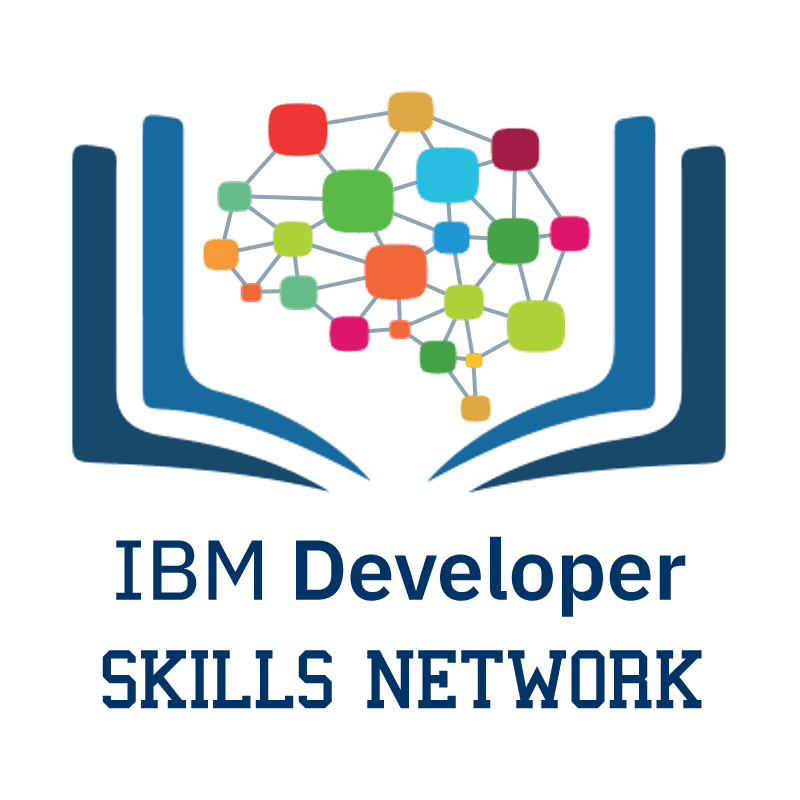

In [58]:
Image.open(path)

In [63]:
import urllib.request

In [67]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt"
filename = 'Example1.txt'
urllib.request.urlretrieve(url, filename)


('Example1.txt', <http.client.HTTPMessage at 0x2813966fb80>)

In [68]:
file1 = open('Example1.txt', 'r')
print(file1.read())

This is line 1 
This is line 2
This is line 3


We can download the file using wget command, but sometimes when it is not installed in the windows env, use the below alternative

In [69]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt'
path = os.path.join(os.getcwd(), 'Example_week5.txt')
path

'C:\\Users\\sspnia\\Desktop\\Niranjan\\Niranjan Work\\IBM Data Science\\Example_week5.txt'

In [72]:
r = requests.get(url)
r

<Response [200]>

In [73]:
with open(path, 'wb') as file1:
    file1.write(r.content)

In [74]:
with open(path, 'r') as file1:
    print(file1.read())

This is line 1 
This is line 2
This is line 3


### GET Request URL Parameters

The Base URL is for http://httpbin.org/ is a simple HTTP Request & Response Service. The URL in Python is given by:

In [127]:
url_get = 'http://httpbin.org/get'
url_get

'http://httpbin.org/get'

A query string is a part of a uniform resource locator (URL), this sends other information to the web server. The start of the query is a ?, followed by a series of parameter and value pairs, as shown in the table below. The first parameter name is name and the value is Joseph the second parameter name is ID and the Value is 123. Each pair, parameter and value is separated by an equals sign, =. The series of pairs is separated by the ampersand &.

In [128]:
query_string_url = 'http://httpbin.org/get?Name=Joseph&ID=123'
query_string_url

'http://httpbin.org/get?Name=Joseph&ID=123'

To create a query string add a dictionary

In [129]:
query_string = {"Name":"Joseph", "ID":"123"}
query_string

{'Name': 'Joseph', 'ID': '123'}

In [130]:
r = requests.get(url_get, params=query_string)
r.url

'http://httpbin.org/get?Name=Joseph&ID=123'

In [131]:
r.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [132]:
print(r.request.body)

None


In [133]:
resp_headers = r.headers
resp_headers

{'Date': 'Wed, 21 Apr 2021 08:08:59 GMT', 'Content-Type': 'application/json', 'Content-Length': '367', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

In [134]:
resp_headers['content-type']
#r.headers['content-type']

'application/json'

In [135]:
r.text

'{\n  "args": {\n    "ID": "123", \n    "Name": "Joseph"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.24.0", \n    "X-Amzn-Trace-Id": "Root=1-607fdd9b-2ee527627d1ccd5c077ccfa2"\n  }, \n  "origin": "119.56.103.37", \n  "url": "http://httpbin.org/get?Name=Joseph&ID=123"\n}\n'

In [136]:
r.json()

{'args': {'ID': '123', 'Name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.24.0',
  'X-Amzn-Trace-Id': 'Root=1-607fdd9b-2ee527627d1ccd5c077ccfa2'},
 'origin': '119.56.103.37',
 'url': 'http://httpbin.org/get?Name=Joseph&ID=123'}

In [137]:
r.json()['args']

{'ID': '123', 'Name': 'Joseph'}

### Post Requests

Like a GET request a POST is used to send data to a server, but the POST request sends the data in a request body. 

In [138]:
url_post = "https://httpbin.org/post"

In [139]:
r_post = requests.post(url_post, data=query_string)
r_post

<Response [200]>

In [140]:
r_post.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '18', 'Content-Type': 'application/x-www-form-urlencoded'}

In [142]:

print("POST Request URL: ", r_post.url)
print("GET Request URL: ", r.url)

POST Request URL:  https://httpbin.org/post
GET Request URL:  http://httpbin.org/get?Name=Joseph&ID=123


In [143]:
print("POST request body: ", r_post.request.body)
print("GET request body: ", r.request.body)

POST request body:  Name=Joseph&ID=123
GET request body:  None


In [144]:
r_post.headers

{'Date': 'Wed, 21 Apr 2021 08:09:33 GMT', 'Content-Type': 'application/json', 'Content-Length': '500', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

In [145]:
r_post.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'ID': '123', 'Name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '18',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.24.0',
  'X-Amzn-Trace-Id': 'Root=1-607fddbd-1d435fcf7f755f5b30a0198f'},
 'json': None,
 'origin': '119.56.103.37',
 'url': 'https://httpbin.org/post'}

In [146]:
r_post.json()['form']

{'ID': '123', 'Name': 'Joseph'}